# Investigating Covid-19 Virus Trends (January 2020 - July 2020)

## Project Overview
For this project will investigate the trends of a Coronavirus in different countries covering a period from January 2020 to July 2020. Coronavirus has been in existence for over 5 years and there is a lot of data on how the virus has evolved as well as on how countries have been affected. However, in our project we will only be interested in understanding the trends for the first 6 months of the virus's  existence in the world. We will use a dataset that was downloaded from kaggle.com.
## Project Questions
Our analysis will be designed to find answers to the following questions:
1. Which countries have had the highest number of deaths due to COVID-19?
2. Which countries have had the highest number of positive cases against the number of tests?
3. Which countries have made the best effort in terms of the number of COVID-19 tests conducted related to their population?
4. Which countries were ultimately the most and the least affected related to their population?
## Import Libraries and Read in Data
We will first import the necessary Python Libraries that will be used for this project then we load the data.

In [1]:
# Import Pandas and Numpy for data manipulation and wrangling
import pandas as pd
import numpy as np

# Import matplotlib and seaborn for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Read in Data
covid = pd.read_csv('covid_19.csv')

# Display the first five records of the data
covid.head()

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
0,2020-01-20,Asia,KR,South Korea,All States,1,0,0,0,4,0,0,0,0
1,2020-01-22,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
2,2020-01-22,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
3,2020-01-23,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
4,2020-01-23,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0


## Data Understanding
Now that we have successfully loaded our dataset, its time we take steps to understand the structure and basic characteristics of the data. 
### Inspect the Data
We have already viewed the first five records of our dataset, now we will check the number of rows and columns of our data.

In [2]:
# Display DataFrame's dimensions
shape = covid.shape
print(f"Our dataset has {shape[0]} rows and {shape[1]} columns.")

Our dataset has 10903 rows and 14 columns.


### Understanding the Variables
Here we will identify the types of variables and identify variables with missing values. We will also give a brief explanation corresponding to ech variable.

In [3]:
# View general information
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10903 entries, 0 to 10902
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     10903 non-null  object
 1   Continent_Name           10903 non-null  object
 2   Two_Letter_Country_Code  10903 non-null  object
 3   Country_Region           10903 non-null  object
 4   Province_State           10903 non-null  object
 5   positive                 10903 non-null  int64 
 6   hospitalized             10903 non-null  int64 
 7   recovered                10903 non-null  int64 
 8   death                    10903 non-null  int64 
 9   total_tested             10903 non-null  int64 
 10  active                   10903 non-null  int64 
 11  hospitalizedCurr         10903 non-null  int64 
 12  daily_tested             10903 non-null  int64 
 13  daily_positive           10903 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1

Our dataset has **10903** rows and **14** columns as stipulated in the table above. The DataFrame do not have missing values. It has 5 columns of the type **object** (strings) and 9 columns of the type **inte64** which are typically **integers**. The following is a breakdown of the column names and an explanation of what they are:
1. `Date`: Date.
2. `Continent_Name`: Continent names.
3. `Two_Letter_Country_Code`: Country codes.
4. `Country_Region`: Country names.
5. `Province_State`: States/province names; value is All States when state/provincial level data is not available.
6. `positive`: Cumulative number of positive cases reported.
7. `hospitalized`: Cumulative number of hospitalized cases reported.
8. `recovered`: Cumulative number of recovered cases reported.
9. `death`: Cumulative number of deaths reported.
10. `total_tested`: Cumulative number of tests conducted.
11. `active`: Number of actively cases on that day.
12. `hospitalizedCurr`: Number of actively hospitalized cases on that day.
13. `daily_tested`: Number of tests conducted on the day; if daily data is unavailable, daily tested is averaged across number of days in between.
14. `daily_positive`: Number of positive cases reported on the day; if daily data is unavailable, daily positive is averaged across number of days in.
### Check for Duplicates.
We will check if our dataset has duplicated records.

In [4]:
# Check for duplicated rows
covid.duplicated().sum()

0

Our dataset do not have duplicates.
### Summary Statistics
Having checked for missing values and duplicates, we found none of course, let us go ahead and display the summary statistics in order to have a general overview of the statistical makeup of our data. 

In [5]:
# Summary Statistics for numeric columns
print(covid.describe())

           positive  hospitalized      recovered         death  total_tested  \
count  1.090300e+04  10903.000000   10903.000000  10903.000000  1.090300e+04   
mean   1.776802e+04    766.402550    2409.220490    947.592956  1.954757e+05   
std    9.314346e+04   5626.325766   11254.209177   5507.242206  8.190222e+05   
min    0.000000e+00      0.000000       0.000000      0.000000  0.000000e+00   
25%    4.400000e+01      0.000000       0.000000      0.000000  2.147500e+03   
50%    1.026000e+03      0.000000       0.000000      6.000000  3.035800e+04   
75%    7.440000e+03      0.000000     500.500000    136.000000  1.252850e+05   
max    1.783570e+06  89590.000000  171883.000000  98536.000000  1.693689e+07   

              active  hospitalizedCurr   daily_tested  daily_positive  
count   10903.000000      10903.000000   10903.000000    10903.000000  
mean     4472.194717        454.074475    6841.403283      497.884619  
std     22277.479931       2253.045376   27198.457892     2354.

In [6]:
# Summary Statistics for qualitative columns
print(covid.describe(include = ['object']))

              Date Continent_Name Two_Letter_Country_Code Country_Region  \
count        10903          10903                   10903          10903   
unique         133              6                     109            109   
top     2020-05-05  North America                      US  United States   
freq           142           6452                    5032           5032   

       Province_State  
count           10903  
unique             81  
top        All States  
freq             3781  


## Data Cleaning
Before we begin figuring out answers to our questions, it is necessary to do some data cleaning. We have no missing values to deal with and no duplicate values to drop. Our data cleaning will dwell much on making the column names formated in a way that will be easy to work with, filtering our data to only include rows necessary for our analysis, droping columns that will not be used in our project and changing the `Date` column data type from **object** to **DateTime**. 
### Cleaning column names
Let us format the column names so that they become consistent and easy to read and work with. 

In [7]:
# making column names all lowercase
covid.columns = covid.columns.str.lower()

# renaming hospitalized column
covid.rename(columns = {'hospitalizedcurr': 'hospitalized_curr'}, inplace = True)

# Display the cleaned column names
for i in covid.columns:
    print(i)

date
continent_name
two_letter_country_code
country_region
province_state
positive
hospitalized
recovered
death
total_tested
active
hospitalized_curr
daily_tested
daily_positive


### Change `date` column datatype
We will change `date` to **datetime** datatype.

In [8]:
# Convert data column to datetime datatype
covid['date'] = pd.to_datetime(covid['date'])

# Display the datatype for date column
print(covid['date'].dtype)

datetime64[ns]


### Isolating the Data we need
We will filter our dataset to include only records that we need. After viewing the first five records of our dataset, one could easily see that `province_state` column has columns for **all states** and data for individual states. For example, data for the **United States**, there is data for all states combined and data points for individual states like Washington. Conducting our analysis with such a dataset would introduce bias. Therefore, we will filter our dataset to only include records at a **country** level. We serve our filtered data to a variable **covid_all_states**.

In [9]:
# All states data
covid_all_states = covid[covid['province_state'] == 'All States'].reset_index(drop = True)
shape = covid_all_states.shape

# Display the dimensions
print(f"New number of rows is {shape[0]}.", f"The number of columns is maintained, we still have {shape[1]} columns.", sep='\n')

New number of rows is 3781.
The number of columns is maintained, we still have 14 columns.


After filtering our dataset to include data at a **country** level, the number of records for our data has reduced from **10, 903** to **3, 781**. Even though we can work with this dataset to find trends and relationships for cummulative variables and then for daily variables, we will choose to divide our dataset into two DataFrames, one related to daily measures which will be called **covid_all_states_daily** and the other related to cummulative measures which will go by the name of **covid_all_states_cummulative**.

In [10]:
# Columns related to cummulative measures
covid_all_states_cummulative = covid_all_states[['date', 'continent_name', \
                                                 'two_letter_country_code', 'positive',\
                                                 'hospitalized', 'recovered', 'death', 'total_tested']]

# Columns related to daily measures
covid_all_states_daily = covid_all_states[['date', 'country_region', 'active', 'hospitalized_curr', 'daily_tested', 'daily_positive']]

# View the dimensions of the the datasets to confirm if filtering has been successful
print(covid_all_states_cummulative.shape, covid_all_states_daily.shape, sep='\n')

(3781, 8)
(3781, 6)


Now that we have isolated our data to only inclide data points that we need for our analysis, it is time we start answering our questions. 
## Identifying Countries with the highest number of Deaths
To identify countries with the highest number of deaths, we will first group **covid_all_states_cummulative** DataFrame by `two_letter_country_code` in order to view the maximum values for cummulative deaths for each country. Our focus is to find the top ten countries with highest numbers of cummulative deaths. We will first display our results in a table, then we will plot a horizontal bar chart for the same.

In [11]:
# A pivot table for cummulative deaths by country
covid_deaths_cum = covid_all_states_cummulative.\
pivot_table(values = 'death', index = 'two_letter_country_code', aggfunc = 'max').sort_values(by = 'death', ascending = False).head(10)
covid_deaths_cum.index = ['United States', 'Italy', 'United Kingdom', 'Belgium', 'Russua', 'Turkey', 'Sweden', 'Canada', 'New Zealand', 'Poland']
covid_deaths_cum.columns = ['Cummulative Deaths']
print(covid_deaths_cum)

                Cummulative Deaths
United States                98536
Italy                        33415
United Kingdom               33186
Belgium                       8903
Russua                        4693
Turkey                        4540
Sweden                        4395
Canada                        3682
New Zealand                   1421
Poland                        1065


From the table above, we can easily see that the country with the highest number of deaths cummulatively is the **United States of America** seconded by **Italy**. Let us now visualize our table.

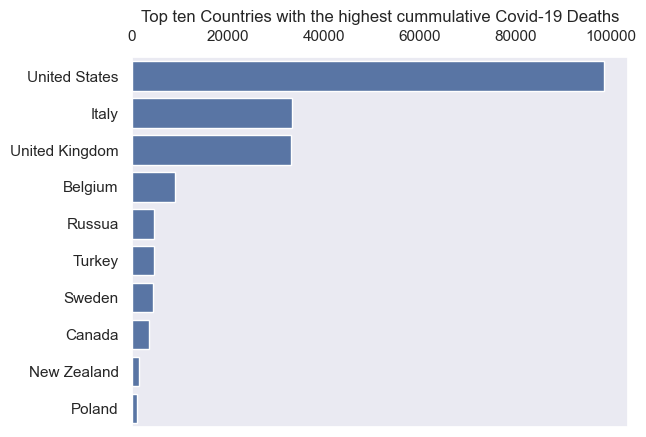

In [12]:
sns.barplot(data = covid_deaths_cum, orient = 'h', x = 'Cummulative Deaths', y = covid_deaths_cum.index)
plt.grid(False)
plt.ylabel('')
plt.xlabel('')
plt.tick_params(labeltop = True, labelbottom = False)
plt.title('Top ten Countries with the highest cummulative Covid-19 Deaths')
plt.show()

We can use the table and chart to answer our first question: **Which countries have had the highest number of deaths due to Covid-19**?

_**Answer**_: 
1. **United States of America**: Cummulative Deaths of **98,536**.
2. **Italy**: Cummulative Deaths of **33,425**.
3. **United Kingdom**: Cummulative Deaths of **33,186**.
## Extracting the Top Ten Tested Cases Countries
Our goal here is to determine countries with highest **tested and confirmed cases**, meaning that we will consider all columns relating to **active** cases, **hospitalized** cases, **daily positive** cases and **daily tested** cases. We will present the results in a table format then we will visualize some important information extracted from the table. For this activity we will use the **covid_all_states_daily** DataFrame.

In [13]:
# Determine the top ten tested cases
covid_all_states_daily_sum = covid_all_states_daily.groupby('country_region')[['active', 'hospitalized_curr', 'daily_tested', 'daily_positive']].sum()
covid_all_states_daily_sum.rename(columns={'daily_tested':'tested', 'daily_positive':'positive', 'hospitalized_curr':'hospitalized'}, inplace = True)
covid_all_states_daily_sum_sorted = covid_all_states_daily_sum.sort_values(by = 'tested', ascending = False)
covid_top_ten = covid_all_states_daily_sum_sorted.head(10)
print(covid_top_ten)

                 active  hospitalized    tested  positive
country_region                                           
United States         0             0  17282363   1877179
Russia          6924890             0  10542266    406368
Italy           6202214       1699003   4091291    251710
India                 0             0   3692851     60959
Turkey          2980960             0   2031192    163941
Canada            56454             0   1654779     90873
United Kingdom        0             0   1473672    166909
Australia        134586          6655   1252900      7200
Peru                  0             0    976790     59497
Poland           538203             0    928256     23987


We can see from the table that the **United States** and **Russia** are the two countries with the highest number of Covid-19 tests. We will use this table for further analysis in order to answer the second question on **positive cases against the number of tests**. For now let us visualize the top ten countries with more Covid-19 tests made.

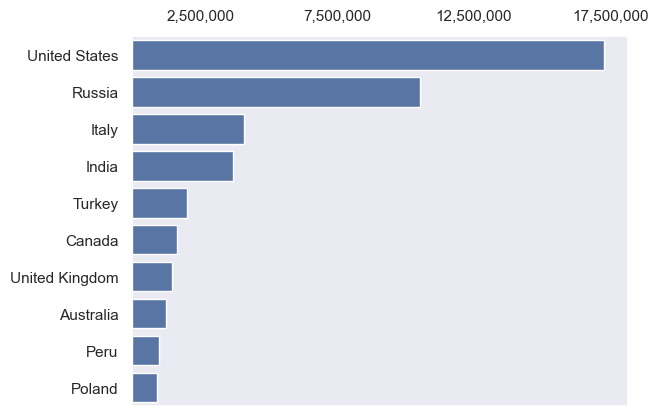

In [14]:
# Visualization
sns.barplot(data=covid_top_ten, orient = 'h', x='tested', y=covid_top_ten.index)
plt.grid(False)
plt.ticklabel_format(axis = 'x', style = 'plain')
plt.xticks([2500000, 7500000, 12500000, 17500000], ['2,500,000', '7,500,000', '12,500,000', '17,500,000'])
plt.tick_params(labeltop = True, labelbottom = False)
plt.ylabel('')
plt.xlabel('')
plt.show()

## Identifying the Highest Positive Against Tested Cases
Here we will essentially be determining the **positivity rate**. In other words, we will be trying to find the percentage of the total number of positive cases in a country in relation to the total number of covid-19 tests conducted in that country. After successfully calculating positivity rate, we will have to determine the countries with the highest positivity rates form the **top ten countries** with high Covid-19 tests. We will use the table that we created in the previous activity. For calculating positivity rate we will use the folowing formula:
$$
Positivity Rate = \left(\frac{Positive Cases}{Total Number of People Tested}\right)*100
$$
We will add a column named **positivity_rate** to **covid_top_ten** DataFrame we created previously. We will assign the result to a variable named **positivity_rated**.

In [15]:
positivity_rated = covid_top_ten.copy()
positivity_rated['positivity_rate'] = (positivity_rated['positive']/positivity_rated['tested'])*100
top_ten_positivity_rated = positivity_rated.sort_values(by='positivity_rate', ascending = False).head(10)['positivity_rate'].reset_index()
print(top_ten_positivity_rated)

   country_region  positivity_rate
0  United Kingdom        11.326062
1   United States        10.861819
2          Turkey         8.071172
3           Italy         6.152337
4            Peru         6.091074
5          Canada         5.491549
6          Russia         3.854655
7          Poland         2.584093
8           India         1.650730
9       Australia         0.574667


We can now answer the second question: **Which countries have had the highest number of positive cases against the number of tests**?

_**Answer**_: 
1. **United Kingdom**: Positivity Rate of **11%**.
2. **United States**: Positivity Rate of **10.8%**.
3. **Turkey**: Positivity Rate of **8%**.

Let us create a chart for our findings.

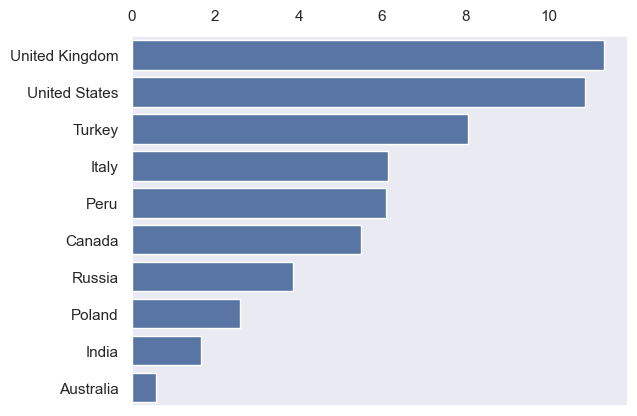

In [16]:
# Visualization
sns.barplot(data = top_ten_positivity_rated, x = 'positivity_rate', y = 'country_region', orient = 'h')
plt.ylabel('')
plt.xlabel('')
plt.tick_params(labeltop = True, labelbottom = False)
plt.grid(False)
plt.show()

## Scaling of Data to Population Level
### Number of Tested Cases against Total Population
In the first six months of the pandemic, countries were boasting on how effective they were in responding to the pandemic. One of the key factor that was used for telling how effective was their response  was **how much testing they have done**. Now, we approach this scenario with an assumption that the impact of the magnitude of testing can only be verified if weighed against the population of each country. We will focus on the **top ten tested countries** to check if their testing initiatives were in balance with their population on those months. We have population data on the **top ten tested countries** during the first six months of the pandemic which we will use for scaling with their corresponding total number of covid-19 tests conductend. 

We will begin by adding a population column to the **covid_top_ten** DataFrame. The following are the population figures for every country with higher numbers of tested cases. 
1. `United States`: 331,002,651
2. `Russia`: 145,934,462
3. `Italy`: 60,461,826
4. `India`: 1,380,004,385
5. `Turkey`: 84,339,067
6. `Canada`: 37,742,154
7. `United Kingdom`: 67,886,011
8. `Australia`: 25,499,884
9. `Peru`: 32,971,854
10. `Poland`: 37,846,611

We will use these population figures for our analysis. We will first come up with a single DataFrame that will have **tested** figures and **population** numbers for each country in the top ten tested countries.

In [17]:
# population list
pop_dict = {'population':[331002651, 145934462, 60461826, 1380004385, 84339067, 37742154, 67886011, 25499884, 32971854, 37846611]}
pop = pd.DataFrame(pop_dict)
pop.index = ['United States', 'Russia', 'Italy', 'India', 'Turkey', 'Canada', 'United Kingdom', 'Australia', 'Peru', 'Poland']
covid_top_ten_pop = covid_top_ten
covid_top_ten_pop = pd.merge(left = covid_top_ten_pop, right = pop, left_index= True, right_index= True)
print(covid_top_ten_pop)

                 active  hospitalized    tested  positive  population
United States         0             0  17282363   1877179   331002651
Russia          6924890             0  10542266    406368   145934462
Italy           6202214       1699003   4091291    251710    60461826
India                 0             0   3692851     60959  1380004385
Turkey          2980960             0   2031192    163941    84339067
Canada            56454             0   1654779     90873    37742154
United Kingdom        0             0   1473672    166909    67886011
Australia        134586          6655   1252900      7200    25499884
Peru                  0             0    976790     59497    32971854
Poland           538203             0    928256     23987    37846611


Let us use the above table to generate a column that will have scaled tested figures adjusted for the the number of people in the respective countries with highest tested figures. We will add a new column name **percentage_tested** to the above table. The following formula will be used:
$$
Population Scale = \left(\frac{Tested Population}{Total Population}\right)*100
$$
We will be calculating the percentage of the population that tested for covid-19 in the first six months of the pandemic.

In [18]:
covid_top_ten_pop['percentage_tested'] = (covid_top_ten_pop['tested']/covid_top_ten_pop['population'])*100
print(covid_top_ten_pop[['tested', 'population', 'percentage_tested']])

                  tested  population  percentage_tested
United States   17282363   331002651           5.221216
Russia          10542266   145934462           7.223973
Italy            4091291    60461826           6.766734
India            3692851  1380004385           0.267597
Turkey           2031192    84339067           2.408364
Canada           1654779    37742154           4.384432
United Kingdom   1473672    67886011           2.170804
Australia        1252900    25499884           4.913356
Peru              976790    32971854           2.962496
Poland            928256    37846611           2.452679


If we go by the above output, we can be able to answer the third question: **Which countries have made the best effort in terms of the number of covid-19 tests conducted related to their population**?

_**Answer**_:
1. **Russua**- Percentage of the population tested: **7%**. 
2. **Italy**- Percentage pf the population tested: **6.8%**
3. **United States**- Percentage of the population tested: **5%**.

Let us now use some of the steps we took to come up with a table above to calculate the `active`, `hospitalized`, and `positive` cases as fractons of their total population for countries with more tested cases. The following activities are aimed at answering the last question of our project.
### Variables as Fractions of their Population level

In [19]:
covid_top_ten_percentage = covid_top_ten_pop.iloc[:, :-1]
covid_top_ten_percentage['active'] = (covid_top_ten_percentage['active']/covid_top_ten_percentage['population'])*100
covid_top_ten_percentage['hospitalized'] = (covid_top_ten_percentage['hospitalized']/covid_top_ten_percentage['population'])*100
covid_top_ten_percentage['tested'] = (covid_top_ten_percentage['tested']/covid_top_ten_percentage['population'])*100
covid_top_ten_percentage['positive'] = (covid_top_ten_percentage['positive']/covid_top_ten_percentage['population'])*100
covid_top_ten_percentage.rename(columns = {'active':'active_cases', 'hospitalized':'hospitalized_cases',\
                                           'tested':'tested_cases', 'positive':'positive_cases'}, inplace = True)
covid_top_ten_percentage.drop('population', axis = 1, inplace = True)
print(covid_top_ten_percentage)

                active_cases  hospitalized_cases  tested_cases  positive_cases
United States       0.000000            0.000000      5.221216        0.567119
Russia              4.745205            0.000000      7.223973        0.278459
Italy              10.258066            2.810042      6.766734        0.416312
India               0.000000            0.000000      0.267597        0.004417
Turkey              3.534495            0.000000      2.408364        0.194383
Canada              0.149578            0.000000      4.384432        0.240773
United Kingdom      0.000000            0.000000      2.170804        0.245867
Australia           0.527791            0.026098      4.913356        0.028235
Peru                0.000000            0.000000      2.962496        0.180448
Poland              1.422064            0.000000      2.452679        0.063380


We have successfully presented each country's data as percentages of their respective total populations. However, it is very difficult to determine how each country is affected by covid-19 using this table as the values are more varied. One of the ways we can determine countries that are most impacted by covid-19 using the table above is by **ranking** the the individual datapoints and then aggregating the **ranks**. The countries with higher aggregated ranks are the mostly affected by the pandemic. We will begin by determining the ranks then we will sum the ranks for each country and keep them in a new column called **total_ranks**. We will lastly sort our table by **total ranks** in descending older to determine the countries mostly affected by the pandemic.

In [20]:
covid_top_ten_percentage_ranked = covid_top_ten_percentage.rank()
covid_top_ten_percentage_ranked['total_ranked'] = covid_top_ten_percentage_ranked.sum(axis=1)
covid_top_ten_percentage_ranked.rename(\
    columns={'active_cases':'active_rank',\
             'hospitalized_cases':'hosp_rank',\
             'tested_case':'tested_rank', 'positive_cases':'pos_rank'}, inplace = True)
covid_top_ten_percentage_ranked.sort_values(by='total_ranked', ascending = False, inplace = True)
print(covid_top_ten_percentage_ranked)

                active_rank  hosp_rank  tested_cases  pos_rank  total_ranked
Italy                  10.0       10.0           9.0       9.0          38.0
Russia                  9.0        4.5          10.0       8.0          31.5
United States           2.5        4.5           8.0      10.0          25.0
Australia               6.0        9.0           7.0       2.0          24.0
Canada                  5.0        4.5           6.0       6.0          21.5
Turkey                  8.0        4.5           3.0       5.0          20.5
Poland                  7.0        4.5           4.0       3.0          18.5
United Kingdom          2.5        4.5           2.0       7.0          16.0
Peru                    2.5        4.5           5.0       4.0          16.0
India                   2.5        4.5           1.0       1.0           9.0


This table contains answers for our last question: **Which Countries were ultimately the most and the least affected related to their population**?

**The most affected country in relation to its population**:
* Italy
 
**The least affected country in relation to its population**:
* India

## Findings
1. The **United States of America**, **Italy** and the **United Kingdom** are the countries that registered the highest number of deaths due to Covid-19 in the first six months of the pandemic.
2. The **United Kingdom**, the **United States of America** and **Turkey** are the countries that registered the highest number of positive cases against the number of tests conducted in the first six months of the pandemic.
3. **Russia**, **Italy** and the **United States of America** are countries which made the best effort in terms of the number of Covid-19 tests conducted in relation to their population in the first six months of the pandemic.
4. **Italy** is the country that was mostly affected by the pandemic in relation to its population and **India** is the country that was least affected by the pandemic in relation to its population in the first six months of the pandemic.

## Conclusion 
In this project we were mostly focused on determing the mostly affected countries by the coronavirus and analysing how they responded to the pandemic through testing activities. We used data collected in the first six months of the pandemic, that is from January 2020 through July 2020.